# Symptom-Based Disease Prediction Chatbot Using NLP

>This project develops a healthcare chatbot leveraging Natural Language Processing (NLP) to predict diseases based on user-reported symptoms. By interacting with the chatbot, users can receive immediate, preliminary disease diagnoses along with advice on the next steps. This tool aims to enhance accessibility to healthcare information, providing a quick, intuitive way for individuals to understand potential health concerns based on their symptoms.

## Importing necessary libraries

In [1]:
# Numpy and pandas for mathematical operations
import numpy as np
import pandas as pd

# To read csv dataset files
import csv

# Regular expression, for pattern matching
import re

# The preprocessing module provides functions for data preprocessing tasks such as scaling and handling missing data.
from sklearn import preprocessing

# For Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# train-test split
from sklearn.model_selection import train_test_split

# For building decision tree models, and _tree to access low-level decision of tree structure
from sklearn.tree import DecisionTreeClassifier, _tree

# For evaluating model performance using cross_validation
from sklearn.model_selection import cross_val_score

# Import Support Vector Classification from sklearn library for model deployment
from sklearn.svm import SVC

# Remove unecessary warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Text to speech using pyttsx3

In [2]:
!sudo apt-get install espeak

'apt-get' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
!pip install pyttsx3

In [3]:
# Import pyttsx3 library
import pyttsx3

In [4]:
# Initialize the text-to-speech engine
engine = pyttsx3.init()

In [5]:
# Function to convert text to speech
def text_to_speech(text):
    # Set properties (optional)
    engine.setProperty('rate', 150)    # Speed percent (can go over 100)
    engine.setProperty('volume', 0.9)  # Volume 0-1

    # Convert text to speech
    engine.say(text)
    engine.runAndWait()

## Exploratory Data Analysis (EDA)


In [ ]:
# Load Datasets for training and testing
training = pd.read_csv('./Data/Training.csv')
testing= pd.read_csv('./Data/Testing.csv')

Feature Names:
['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'p

In [7]:
# Number of rows and columns
shape = training.shape
print("Shape of Training dataset: ", shape)

Shape of Training dataset:  (4920, 133)


In [8]:
# Description about dataset
description = training.describe()
description

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Information about Dataset
info_df = training.info()
info_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [10]:
# To find total number of null values in dataset
null_values_count = training.isnull().sum()
null_values_count

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [11]:
# Print First eight rows of the Dataset
training.head(8)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
5,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
6,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
7,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [12]:
cols= training.columns
cols= cols[:-1]

# x stores every column data except the last one
x = training[cols]

# y stores the target variable for disease prediction
y = training['prognosis']

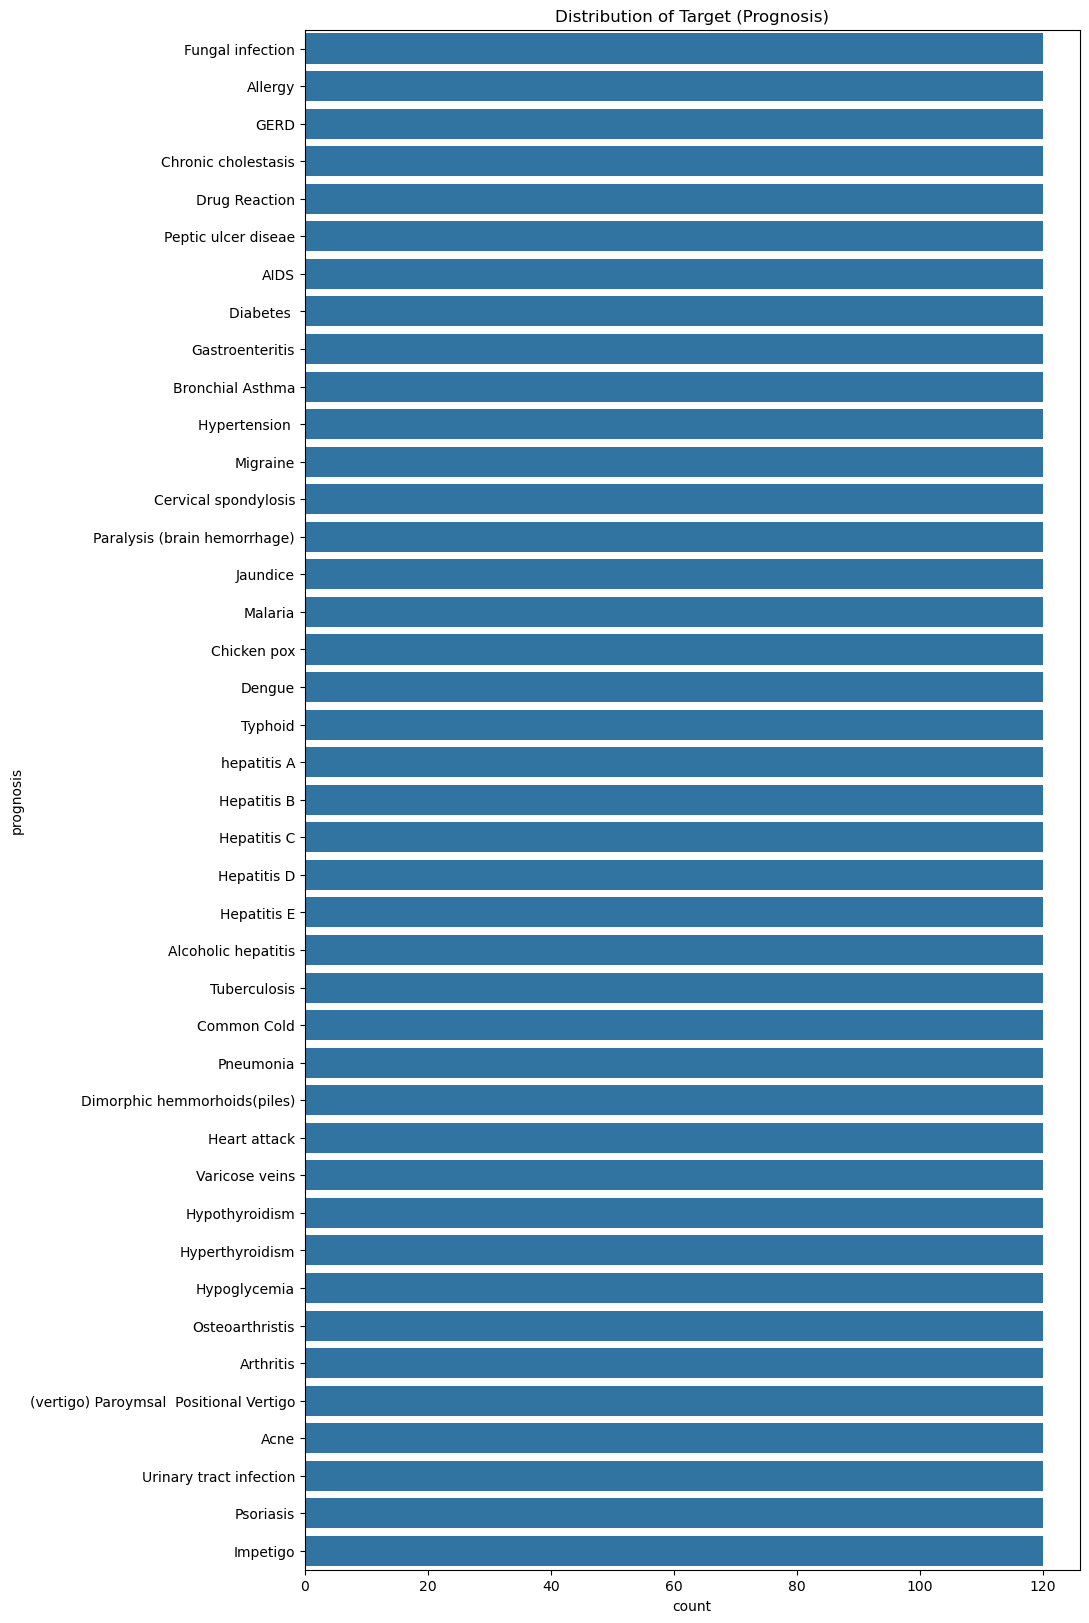

In [13]:
# Figsize used to define size of the figure
plt.figure(figsize=(10, 20))
# Countplot from seaborn on the target varable and data accesed from Training dataset
sns.countplot(y='prognosis', data=training)
# Tile for title of the figur
plt.title('Distribution of Target (Prognosis)')
# Show used to display the figure on screen
plt.show()

In [14]:
# Grouping Data by Prognosis and Finding Maximum Values
reduced_data = training.groupby(training['prognosis']).max()

# Display the first five rows of the reduced data
reduced_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
prognosis,,,,,,,,,,,,,,,,,,,,,
(vertigo) Paroymsal Positional Vertigo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AIDS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Acne,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
Alcoholic hepatitis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Allergy,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data Pre-processing

In [15]:
# Mapping categorical strings to numerical labels using LabelEncoder
le = preprocessing.LabelEncoder()

# Fit the label encoder to the target variable 'y' and transform it
le.fit(y)
y = le.transform(y)

In [ ]:
# Splitting the dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Features for testing except the last variable
testx    = testing[cols]

# Target variable for Testing
testy    = testing['prognosis']

# Transforming categorical value into numerical labels
testy    = le.transform(testy)

Feature Names (cols): ['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_ra

In [23]:
import json

# Lưu mảng feature names vào file JSON
feature_names_array = list(cols)  # Chuyển từ Index thành list

with open('feature_names.json', 'w') as file:
    json.dump(feature_names_array, file)

print("Feature names đã được lưu vào feature_names.json")


Feature names đã được lưu vào feature_names.json


## Model building and evaluation

In [17]:
# Decision Tree Model Implementation
clf1  = DecisionTreeClassifier()

# Fitting the Training Data
clf = clf1.fit(x_train,y_train)

# Cross-Validation for Model Evaluation
scores = cross_val_score(clf, x_test, y_test, cv=3)

# Print the Mean Score
print("Mean Score: ",scores.mean())

Mean Score:  0.974756327969934


In [ ]:
import pickle

# Lưu Decision Tree model
with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(clf, file)


In [29]:
# Creating Support Vector Machine Model
model=SVC()

# Train the model on Training Data
model.fit(x_train,y_train)

# Print accuracy for SVM Model on the training set
print("Accuracy score for svm: ", model.score(x_test,y_test))

# Calculate feature importance using the trained Decision tree classifier
importances = clf.feature_importances_

# Sort indices in descending order based on feature importance
indices = np.argsort(importances)[::-1]

# Get feature names corresponding to their importance score
features = cols

Accuracy score for svm:  1.0


In [32]:
# Lưu SVM model
with open('notebooks/svm_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [30]:
# Initialize dictionaries to store symptom severity, description, and precautions

severityDictionary=dict()
description_list = dict()
precautionDictionary=dict()

# Dictionary to map symptoms to their indices
symptoms_dict = {}

# Populate symptoms dictionary with indices
for index, symptom in enumerate(x):
       symptoms_dict[symptom] = index

# Function to calculate the overall severity of the symptom
def calc_condition(exp,days):
    sum=0
    for item in exp:
         sum=sum+severityDictionary[item]
    if((sum*days)/(len(exp)+1)>13):
        print("You should take the consultation from doctor. ")
    else:
        print("It might not be that bad but you should take precautions.")


# Function to read and store symptom descriptions from a CSV file
def getDescription():
    global description_list
    with open('./Data/symptom_Description.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            _description={row[0]:row[1]}
            description_list.update(_description)



# Function to read and store symptom severity information from a CSV file
def getSeverityDict():
    global severityDictionary
    with open('./Data/Symptom_severity.csv') as csv_file:

        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        try:
            for row in csv_reader:
                _diction={row[0]:int(row[1])}
                severityDictionary.update(_diction)
        except:
            pass



# Function to read and store symptom precaution information from a CSV file
def getprecautionDict():
    global precautionDictionary
    with open('./Data/symptom_precaution.csv') as csv_file:

        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            _prec={row[0]:[row[1],row[2],row[3],row[4]]}
            precautionDictionary.update(_prec)